# Latar Belakang

Dalam rangka meningkatkan kualitas layanan, efisiensi operasional, serta keberlanjutan finansial, PT TransJakarta melakukan inisiatif untuk melakukan analisis data berbasis transaksi pelanggan. Sebagai bagian dari inisiatif ini, perusahaan menunjuk data analyst untuk melakukan evaluasi menyeluruh terhadap pola penggunaan layanan bus TransJakarta.

Analisis ini bertujuan untuk mengungkap:

- Pola perjalanan pelanggan (jam sibuk, koridor padat)
- Distribusi beban subsidi (pola transaksi gratis)
- Identifikasi incomplete trips (tap-in tanpa tap-out)
- Segmentasi pelanggan untuk pengembangan program loyalitas dan penjadwalan armada

Pemahaman mendalam terhadap data ini akan membantu TransJakarta merancang kebijakan berbasis data yang berdampak langsung terhadap pengurangan kerugian operasional, peningkatan pengalaman pelanggan, dan pengambilan keputusan strategis.

# Pernyataan Masalah
Salah satu permasalahan krusial yang dihadapi PT TransJakarta adalah tingginya jumlah incomplete trip, yaitu kasus ketika pelanggan hanya melakukan tap-in namun tidak melakukan tap-out. Hal ini dapat menyebabkan:
- Kehilangan pendapatan atau beban subsidi yang tidak akurat
- Ketidaksesuaian data rute dan waktu perjalanan
- Potensi kesalahan sistem pembacaan kartu
- Kesulitan dalam perencanaan operasional armada

Oleh karena itu, PT TransJakarta ingin mengetahui:
- Apa perbedaan karakteristik antara pelanggan yang mengalami incomplete trip dan pelanggan yang menyelesaikan perjalanannya dengan lengkap?



## Import Library dan data set


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_dataset = "/Users/jhonsonjustin/Desktop/Pruwadhika/Module 2 - Data Analysis/Public Transportation Transaction - Transjakarta/Transjakarta.csv"

In [3]:
df = pd.read_csv(path_dataset)

# 1. Data Cleansing


### 1.a Menampilkan data dan informasi awal


In [4]:
display(df.head())
df.info()
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Dataset tersebut memberikan informasi mengenai transaksi, kartu pembayaran, rute bus, stasiun dan lainnya

 - transID: ID transaksi unik untuk setiap transaksi.
 - payCardID: Identifier utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
 - payCardBank: Nama bank penerbit kartu pelanggan.
 - payCardName: Nama pelanggan yang tertanam pada kartu.
 - payCardSex: Jenis kelamin pelanggan yang tertanam pada kartu.
 - payCardBirthDate: Tahun lahir pelanggan.
 - corridorID: ID koridor / ID rute sebagai kunci untuk pengelompokan rute.
 - corridorName: Nama koridor / nama rute yang berisi titik awal dan akhir untuk setiap rute.
 - direction: 0 untuk Pergi, 1 untuk Kembali. Arah rute.
 - tapInStops: ID pemberhentian Tap In (masuk) untuk mengidentifikasi nama pemberhentian.
 - tapInStopsName: Nama pemberhentian Tap In (masuk) tempat pelanggan melakukan tap in.
 - tapInStopsLat: Latitude (garis lintang) pemberhentian Tap In.
 - tapInStopsLon: Longitude (garis bujur) pemberhentian Tap In.
 - stopStartSeq: Urutan pemberhentian, seperti pemberhentian pertama, kedua, dll., berkaitan dengan arah rute.
 - tapInTime: Waktu tap in, mencakup tanggal dan jam.
 - tapOutStops: ID pemberhentian Tap Out (keluar) untuk mengidentifikasi nama pemberhentian.
 - tapOutStopsName: Nama pemberhentian Tap Out (keluar) tempat pelanggan melakukan tap out.
 - tapOutStopsLat: Latitude (garis lintang) pemberhentian Tap Out.
 - tapOutStopsLon: Longitude (garis bujur) pemberhentian Tap Out.
 - stopEndSeq: Urutan pemberhentian saat keluar, seperti pemberhentian pertama, kedua, dll., berkaitan dengan arah rute.
 - tapOutTime: Waktu tap out, mencakup tanggal dan jam.
 - payAmount: Jumlah yang dibayar pelanggan. Ada yang gratis dan ada yang tidak.

### 1.b Perubahan Tipe Data yang Cocok
- tap in / out time -> DateTime
- direction, paycardsex, payCardBank, corridorID, corridorName, tapInStops, tapOutStops -> kolom kategorikal
- paycardBirthdate -> DateTime -> Age
- stopEndSeq -> int
- reset index

In [5]:

df['tapInTime']  = pd.to_datetime(df['tapInTime'],  errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')
df['direction']  = df['direction'].map({0:'Pergi',1:'Kembali'}).astype('category')
df['payCardSex'] = df['payCardSex'].astype('category')

# penggunaan coerce pada fungsi pd.to_datetime untuk menghindari error jika ada data yang tidak bisa diubah menjadi datetime*

In [6]:
for col in ['payCardBank','corridorID','corridorName','tapInStops','tapOutStops']:
    df[col] = df[col].astype('category')

# Looping singkat untuk mengubah beberapa kolom teks menjadi category.


- Menghitung usia dari tahun lahir

In [7]:
df['birthDate'] = pd.to_datetime(df['payCardBirthDate'].astype(str) + '-01-01')
# Mengubah kolom payCardBirthDate menjadi datetime dengan format YYYY-MM-DD
df['age'] = (pd.Timestamp.today() - df['birthDate']).dt.days // 365
# Menghitung usia berdasarkan tanggal lahir, dengan pembulatan ke bawah untuk mendapatkan usia dalam tahun

- Konversi kolom stopEndSeq dari float --> integer

In [8]:
df['stopEndSeq'] = df['stopEndSeq'].astype('Int64')


- reset index

In [9]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  category      
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  category      
 7   corridorName      35970 non-null  category      
 8   direction         37900 non-null  category      
 9   tapInStops        36687 non-null  category      
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

- Simpan versi awal kolom payAmount

In [10]:
df['payAmount_raw'] = df['payAmount']

- Pengecekan incomplete trip

In [11]:
# Sudah bayar tapi tidak tap out
df[(df['tapOutTime'].isna()) & (df['payAmount_raw'].notna())]

# Belum bayar dan tidak tap out (mungkin error)
df[(df['tapOutTime'].isna()) & (df['payAmount_raw'].isna())]

print("A: Bayar tapi tidak tap out:", df[(df['tapOutTime'].isna()) & (df['payAmount_raw'].notna())].shape[0])
print("B: Tidak bayar dan tidak tap out:", df[(df['tapOutTime'].isna()) & (df['payAmount_raw'].isna())].shape[0])

A: Bayar tapi tidak tap out: 1305
B: Tidak bayar dan tidak tap out: 39


## 1.b. Cek missing value

Jumlah missing value di setiap kolom

In [12]:
missing = df.isna().sum().sort_values(ascending=False)
display(missing)


tapOutStops         2289
corridorName        1930
tapOutTime          1344
stopEndSeq          1344
tapOutStopsLon      1344
tapOutStopsLat      1344
tapOutStopsName     1344
corridorID          1257
tapInStops          1213
payAmount_raw       1007
payAmount           1007
tapInTime              0
age                    0
birthDate              0
transID                0
stopStartSeq           0
payCardID              0
tapInStopsLat          0
tapInStopsName         0
direction              0
payCardBirthDate       0
payCardSex             0
payCardName            0
payCardBank            0
tapInStopsLon          0
dtype: int64

Persentase missing value

In [13]:
percent_missing = (df.isna().mean() * 100).sort_values(ascending=False)
display(percent_missing)

tapOutStops         6.039578
corridorName        5.092348
tapOutTime          3.546174
stopEndSeq          3.546174
tapOutStopsLon      3.546174
tapOutStopsLat      3.546174
tapOutStopsName     3.546174
corridorID          3.316623
tapInStops          3.200528
payAmount_raw       2.656992
payAmount           2.656992
tapInTime           0.000000
age                 0.000000
birthDate           0.000000
transID             0.000000
stopStartSeq        0.000000
payCardID           0.000000
tapInStopsLat       0.000000
tapInStopsName      0.000000
direction           0.000000
payCardBirthDate    0.000000
payCardSex          0.000000
payCardName         0.000000
payCardBank         0.000000
tapInStopsLon       0.000000
dtype: float64

### Berdasarkan hasil pengecekan missing value dapat disimpulkan : 
- kolom tapOutStops, tapOutStopsLat, tapOutStopsLon, tapOutStopsName, stopEndSeq : Bergantung pada kolom tapOutTime — jika tap out kosong, maka kolom-kolom tersebut akan di drop karena saling terkait (Tidak logis jika seseorang tap out tapi tidak diketahui di mana.)
- kolom corridorID & corridorName : Penting untuk analisis rute paling sering terjadi incomplete trip.
- kolom tapInStops : Drop baris yang kosong, karena tidak bisa dianalisis secara rute (Tanpa titik masuk, tidak ada titik awal perjalanan.)
- kolom tapOutTime : Kolom utama untuk mendeteksi incomplete trip
- kolom payAmount : Kolom untuk mengetahui free trip atau error pada sistem bayar

- Kolom sisanya sudah tidak terdapat missing value

### 1.c. Data Cleansing

- memisahkan data incomplete trip untuk analisis

In [14]:
incomplete_trip = df[df['tapOutTime'].isna()].copy()


- Ambil data lengkap

In [15]:
clean_trip = df[df['tapOutTime'].notna()].copy()

- drop kolom pada clean_trip yang masih NaN karena tidak bisa dianalisis tanpa nilai tersebut

In [16]:
cols_to_drop = ['tapInStops', 'corridorID', 'corridorName']
clean_trip = clean_trip.dropna(subset=cols_to_drop)

- pengecekan missing value pada clean_trip

In [17]:
clean_trip.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops         871
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           885
birthDate             0
age                   0
payAmount_raw       885
dtype: int64

- setelah melakukan data cleansing pada clean_trip, bisa dilihat tersisa missing value pada tapOutStops dan payAmount, namun ini akan saya biarkan untuk keperluan analisis, karna jika saya isi dengan 0 akan terbaca menjadi value, sehingga akan mempengaruhi analisa incomplete trip yang akan dilakukan

In [51]:
display(df)
df.to_csv("transjakarta_cleaned.csv", index=False, sep=",", encoding="utf-8")


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,birthDate,age,payAmount_raw,trip_status,hour,is_free_trip
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Kembali,P00142,...,106.85715,12,2023-04-03 06:00:53,3500.0,2008-01-01,17,3500.0,Complete,5,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Pergi,B01963P,...,106.81892,21,2023-04-03 06:40:01,3500.0,1997-01-01,28,3500.0,Complete,5,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Pergi,B00499P,...,106.81475,39,2023-04-03 06:50:55,3500.0,1992-01-01,33,3500.0,Complete,5,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pergi,B05587P,...,106.93194,29,2023-04-03 06:28:16,3500.0,1978-01-01,47,3500.0,Complete,5,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Pergi,P00239,...,106.81143,15,2023-04-03 06:57:03,3500.0,1982-01-01,43,3500.0,Complete,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Kembali,P00261,...,106.82365,13,2023-04-21 19:55:49,3500.0,2004-01-01,21,3500.0,Complete,18,False
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Kembali,P00064,...,106.88634,2,2023-04-18 22:28:22,3500.0,1974-01-01,51,3500.0,Complete,21,False
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Kembali,B02873P,...,106.89628,14,2023-04-04 13:27:25,20000.0,1976-01-01,49,20000.0,Complete,10,False
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Kembali,B02505P,...,106.81135,34,2023-04-15 20:27:50,0.0,1976-01-01,49,0.0,Complete,19,True


### 1.d. Melakukan Eksplorasi dan Segmentasi data

Saya akan melakukan segementasi perjalanan ke 4 segmen :
- a. incomplete trip
- b. complete free
- c. complete paid
- d. incomplete paid

In [19]:
# A. Incomplete trip (tidak tap out)
incomplete_trip = df[df['tapOutStops'].isna()]

# B. Complete + Free trip
complete_free = df[(df['tapOutStops'].notna()) & (df['payAmount'] == 0)]

# C. Complete + Paid
complete_paid = df[(df['tapOutStops'].notna()) & (df['payAmount'] > 0)]

# D. Incomplete + Bayar (jarang, tapi perlu dicek juga)
incomplete_paid = df[(df['tapOutStops'].isna()) & (df['payAmount'] > 0)]

In [20]:
print("Jumlah perjalanan:")
print(f"- Incomplete Trip       : {incomplete_trip.shape[0]}")
print(f"- Complete Free Trip    : {complete_free.shape[0]}")
print(f"- Complete Paid Trip    : {complete_paid.shape[0]}")
print(f"- Incomplete but Paid   : {incomplete_paid.shape[0]}")

Jumlah perjalanan:
- Incomplete Trip       : 2289
- Complete Free Trip    : 15621
- Complete Paid Trip    : 19044
- Incomplete but Paid   : 1201


### 1.e Data analysis

Pada bagian ini, saya akan melakukan analisis data untuk menjawab pertanyaan “Apa karakteristik pengguna yang mengalami incomplete trip?” menggunakan statsitika deskriptif serta inferensial

### Usia Pengguna
- Apakah terdapat perbedaan usia yang signifikan antara pengguna yang mengalami incomplete trip dan complete trip?



In [21]:
incomplete_trip = df[df['tapOutStops'].isna()]
complete_trip   = df[df['tapOutStops'].notna()]

In [22]:
# Statistik usia
print("Statistik Usia - Incomplete Trip:")
print(incomplete_trip['age'].describe())

print("\nStatistik Usia - Complete Trip:")
print(complete_trip['age'].describe())

Statistik Usia - Incomplete Trip:
count    2289.000000
mean       35.414155
std        13.067057
min        13.000000
25%        25.000000
50%        35.000000
75%        43.000000
max        79.000000
Name: age, dtype: float64

Statistik Usia - Complete Trip:
count    35611.000000
mean        34.878324
std         13.050000
min         13.000000
25%         24.000000
50%         35.000000
75%         43.000000
max         79.000000
Name: age, dtype: float64


Berdasarkan uji statistik ini, dapat dilihat bahwa:
- Rata-rata usia sedikit lebih tinggi pada pengguna yang mengalami incomplete trip.
- Median sama -> distribusi usia relatif mirip.
- Standar deviasi juga hampir identik -> sebaran usia juga mirip.
Sehingga dapat disimpulkan bahwa
Ini belum menunjukkan perbedaan yang signifikan, jadi kita perlu lanjut ke pengujian berikutnya

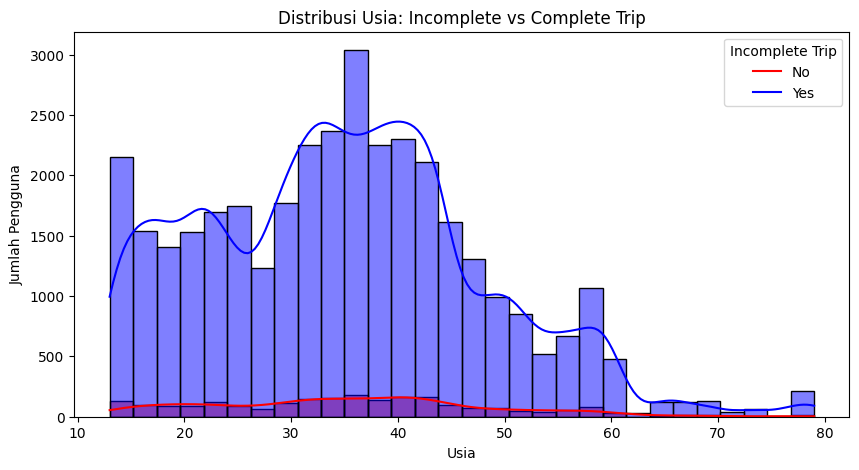

In [23]:

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue=df['tapOutStops'].isna(), bins=30, kde=True, palette=['blue','red'])
plt.title("Distribusi Usia: Incomplete vs Complete Trip")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pengguna")
plt.legend(title='Incomplete Trip', labels=['No', 'Yes'])
plt.show()

Berdasarkan plot ini, dapat disimpulkan bahwa :
- Pengguna usia produktif (30–45 tahun) lebih dominan dalam kedua kelompok, termasuk yang mengalami incomplete trip.
- Namun, tidak ada indikasi visual yang jelas bahwa usia memengaruhi risiko incomplete trip karena perbedaan terlihat kecil.

In [24]:
from scipy.stats import normaltest

# Contoh pada kolom usia
stat, p = normaltest(df['age'])

print(f'Statistik: {stat:.3f}, P-Value: {p:.4f}')

if p < 0.05:
    print("Data TIDAK berdistribusi normal")
else:
    print("Data berdistribusi normal")

Statistik: 1000.163, P-Value: 0.0000
Data TIDAK berdistribusi normal


Karena data berdistribusi tidak normal, maka akan dilanjutkan dengan pengujian mannwhitne dengan :
- H0 : Tidak ada perbedaan distribusi usia antara pengguna yang melakukan incomplete trip dan complete trip.
- H1 : Terdapat perbedaan distribusi usia antara pengguna yang melakukan incomplete trip dan complete trip.

- Jika p-value ≥ 0.05 -> Gagal tolak H₀ -> Tidak ada perbedaan signifikan.
- Jika p-value < 0.05 -> Tolak H₀ -> Ada perbedaan signifikan.

In [25]:
from scipy.stats import mannwhitneyu

# Lakukan uji Mann-Whitney
stat, pval = mannwhitneyu(
    incomplete_trip['age'],
    complete_trip['age'],
    alternative='two-sided'
)

print(f"Statistik Uji: {stat:.2f}")
print(f"P-value: {pval:.4f}")

if pval < 0.05:
    print("Terdapat perbedaan usia yang signifikan antara pengguna incomplete trip dan complete trip.")
else:
    print("Tidak terdapat perbedaan usia yang signifikan antara pengguna incomplete trip dan complete trip.")



Statistik Uji: 41794926.00
P-value: 0.0407
Terdapat perbedaan usia yang signifikan antara pengguna incomplete trip dan complete trip.


Karena p-value < 0.05, maka:

- Kita menolak H0 dan menerima H1, ada perbedaan signifikan dalam usia antara kedua kelompok perjalanan.

Kita lanjut ke analisis gender


### Jenis Kelamin
- Apakah terdapat perbedaan proporsi jenis kelamin (pria/wanita) antara pengguna incomplete trip dan complete trip?

In [26]:
df['trip_status'] = df['tapOutTime'].notna().map({True: 'Complete', False: 'Incomplete'})

# Buat tabel kontingensi
gender_ct = pd.crosstab(df['trip_status'], df['payCardSex'])
display(gender_ct)

payCardSex,F,M
trip_status,,
Complete,19469,17087
Incomplete,688,656


In [27]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(gender_ct)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Terdapat perbedaan proporsi jenis kelamin antara pengguna incomplete dan complete trip.")
else:
    print("Tidak terdapat perbedaan signifikan dalam proporsi jenis kelamin.")

Chi-square statistic: 2.14
P-value: 0.1432
Tidak terdapat perbedaan signifikan dalam proporsi jenis kelamin.


Tidak terdapat perbedaan signifikan dalam distribusi jenis kelamin antara pengguna yang mengalami incomplete trip dan yang menyelesaikan complete trip.
Saya akan menampilkan visualisasi berupa bar plot dan juga pie chart untuk meperjelas data yang dimaksud

In [28]:
gender_plot = df.groupby(['trip_status', 'payCardSex']).size().reset_index(name='count')

/var/folders/w7/bg5wr_cx3ss25nwxdx_b_qbh0000gn/T/ipykernel_11525/46917998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_plot = df.groupby(['trip_status', 'payCardSex']).size().reset_index(name='count')


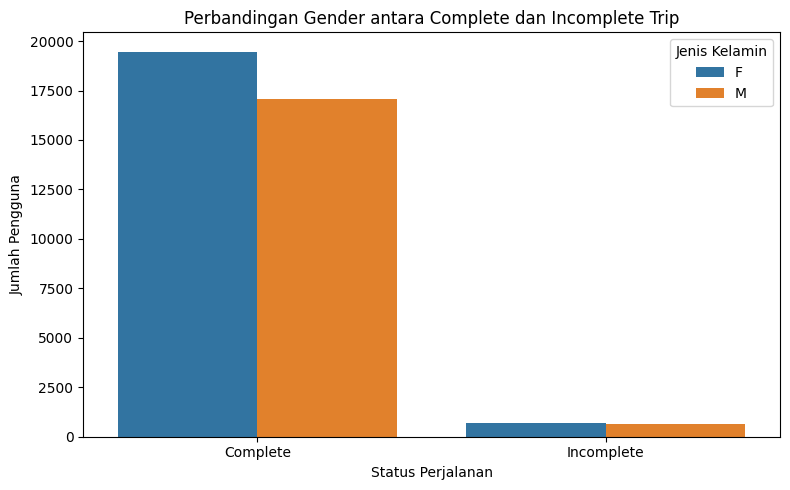

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_plot, x='trip_status', y='count', hue='payCardSex')
plt.title('Perbandingan Gender antara Complete dan Incomplete Trip')
plt.xlabel('Status Perjalanan')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()

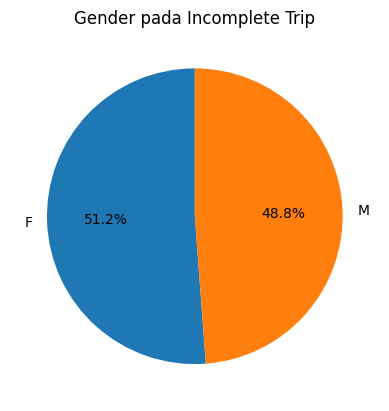

In [30]:
incomplete_gender = df[df['trip_status'] == 'Incomplete']['payCardSex'].value_counts()
incomplete_gender.plot.pie(autopct='%1.1f%%', startangle=90, title='Gender pada Incomplete Trip', ylabel='')
plt.show()

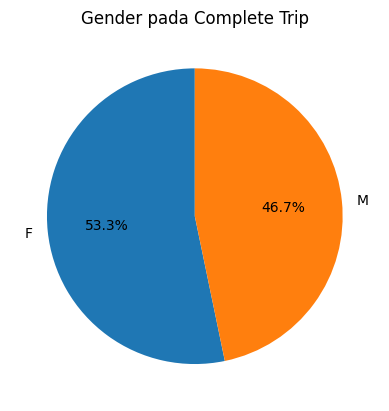

In [31]:
complete_gender = df[df['trip_status'] == 'Complete']['payCardSex'].value_counts()
complete_gender.plot.pie(autopct='%1.1f%%', startangle=90, title='Gender pada Complete Trip', ylabel='')
plt.show()

Berdasarkan visualisasi di atas, distribusi gender antara pengguna complete trip dan incomplete trip terlihat cukup seimbang. Hasil ini memperkuat temuan dari uji statistik yang telah dilakukan bahwa tidak ada perbedaan signifikan dalam proporsi jenis kelamin antara kedua kelompok pengguna.

### Lokasi dan Koridor
- Apakah terdapat rute (koridor) tertentu yang memiliki jumlah incomplete trip lebih tinggi dari yang lain?

In [32]:

koridor_trip = df.groupby(['corridorName', 'trip_status'], observed=True).size().unstack(fill_value=0)

In [33]:

koridor_trip['total'] = koridor_trip.sum(axis=1)
koridor_trip['pct_incomplete'] = (koridor_trip['Incomplete'] / koridor_trip['total']) * 100

In [ ]:

koridor_trip_sorted = koridor_trip.sort_values('pct_incomplete', ascending=False)
display(koridor_trip_sorted.head(10))

trip_status,Complete,Incomplete,total,pct_incomplete
corridorName,,,,
Tanah Abang - Kebayoran Lama via Pos Pengumben,21,2,23,8.695652
Kp. Rambutan - Taman Wiladatika,75,7,82,8.536585
Rusun Marunda - Tanjung Priok,131,12,143,8.391608
Harapan Baru - Pulo Gebang via Rawa Kuning,121,11,132,8.333333
Rusun Cipinang Besar Selatan - Penas Kalimalang,127,11,138,7.971014
Senen - Tanah Abang,38,3,41,7.317073
Sunter Boulevard Barat - Penjaringan,89,7,96,7.291667
Stasiun Tebet - Kampung Melayu,146,11,157,7.006369
Cilincing - Rorotan,254,18,272,6.617647


Berdasarkan tabel ini, bisa dilihat top 10 corridor dengan persentase incomplete tertinggi
Koridor Tanah Abang - Kebayoran Lama via Pos Pengumben dan Kp. Rambutan - Taman Wiladatika memiliki proporsi incomplete trip tertinggi, meskipun secara total trip tidak sebanyak koridor lainnya.

In [35]:
koridor_trip_sorted_by_incomplete = koridor_trip.sort_values('Incomplete', ascending=False)
display(koridor_trip_sorted_by_incomplete.head(10))

trip_status,Complete,Incomplete,total,pct_incomplete
corridorName,,,,
Kebayoran Lama - Tanah Abang,315,18,333,5.405405
Cilincing - Rorotan,254,18,272,6.617647
Cibubur - Balai Kota,375,16,391,4.092072
Pulo Gadung - Monas,328,15,343,4.373178
Senen - Blok M,235,13,248,5.241935
Kalideres - Bundaran HI via Veteran,319,13,332,3.915663
Andara - Stasiun Universitas Pancasila,226,13,239,5.439331
Kampung Rambutan - Pasar Rebo via Poncol,284,13,297,4.377104
Kampung Melayu - Pulo Gebang via BKT,281,12,293,4.095563


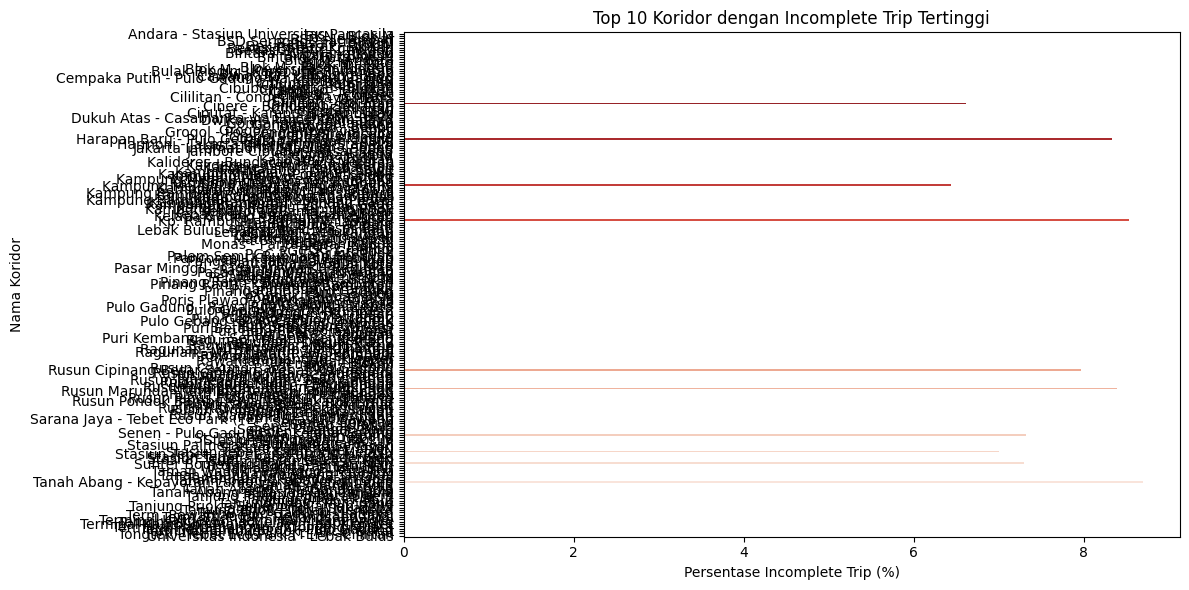

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_koridor = koridor_trip_sorted.head(10).reset_index()
plt.figure(figsize=(12, 6))


sns.barplot(
    data=top10_koridor,
    x='pct_incomplete',
    y='corridorName',
    hue='corridorName',   
    palette='Reds_r',
    dodge=False,
    legend=False                
)

plt.xlabel('Persentase Incomplete Trip (%)')
plt.ylabel('Nama Koridor')
plt.title('Top 10 Koridor dengan Incomplete Trip Tertinggi')

plt.tight_layout()

plt.show()


jika saya visulisasikan dengan plot ini, tidak terlihat dengan jelas sehingga lebih baik menggunakan tabel diatas saja

Selanjutnya, saya akan memvisualisasikan dalam peta, data tap In dari penumpang yang tidak menyelesaikan perjalanan / incomplete trip

In [ ]:
import folium

incomplete_map = df[df['trip_status'] == 'Incomplete']

#  peta di Jakarta
m = folium.Map(location=[-6.2, 106.8], zoom_start=11)

# titik tap-in
for _, row in incomplete_map.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m

Setiap titik merah mewakili lokasi tap-in (naik bus) dari incomplete trip tersebut.
Namun sepertinya untuk memperjelas, akan saya berikan heatmap untuk mempermudah melihat daerah dari incomplete trip tersebut

In [38]:
from folium.plugins import HeatMap

heat_data = incomplete_map[['tapInStopsLat', 'tapInStopsLon']].values.tolist()

m = folium.Map(location=[-6.2, 106.8], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(m)
m

Berdasarkan visualisasi heatmap, ditemukan konsentrasi tinggi titik tap-in tanpa tap-out di wilayah jakarta pusat, menuju selatan

### Waktu (Jam Perjalanan)
- Apakah ada pola waktu tertentu (misalnya pagi, siang, malam) yang menunjukkan lonjakan incomplete trip?
- apakah proporsi Incomplete Trip berbeda secara signifikan antar jam

In [52]:
# Buat kolom jam (hour) dari tapInTime
df['hour'] = df['tapInTime'].dt.hour

# Hitung jumlah trip per jam berdasarkan status
trip_by_hour = df.groupby(['hour', 'trip_status']).size().unstack(fill_value=0)

# Tambahkan total dan proporsi incomplete
trip_by_hour['total'] = trip_by_hour.sum(axis=1)
trip_by_hour['pct_incomplete'] = 100 * trip_by_hour['Incomplete'] / trip_by_hour['total']

trip_summary_sorted = trip_by_hour.sort_values(by='Incomplete', ascending=False)
display(trip_summary_sorted)



trip_status,Complete,Incomplete,total,pct_incomplete
hour,,,,
6,5624,215,5839,3.682137
17,5286,202,5488,3.680758
16,3239,126,3365,3.744428
5,3240,118,3358,3.513996
7,2700,112,2812,3.982930
18,2338,100,2438,4.101723
8,2785,95,2880,3.298611
9,2718,89,2807,3.170645
19,2367,88,2455,3.584521


Berdasarkan data diatas, bisa dilihat jumlah transaksi incomplete berdasarkan jam tertentu, berikut akan saya plot untuk memvisualisasikan jumlah Incomplete Trip terhadap Jam (0–23). 

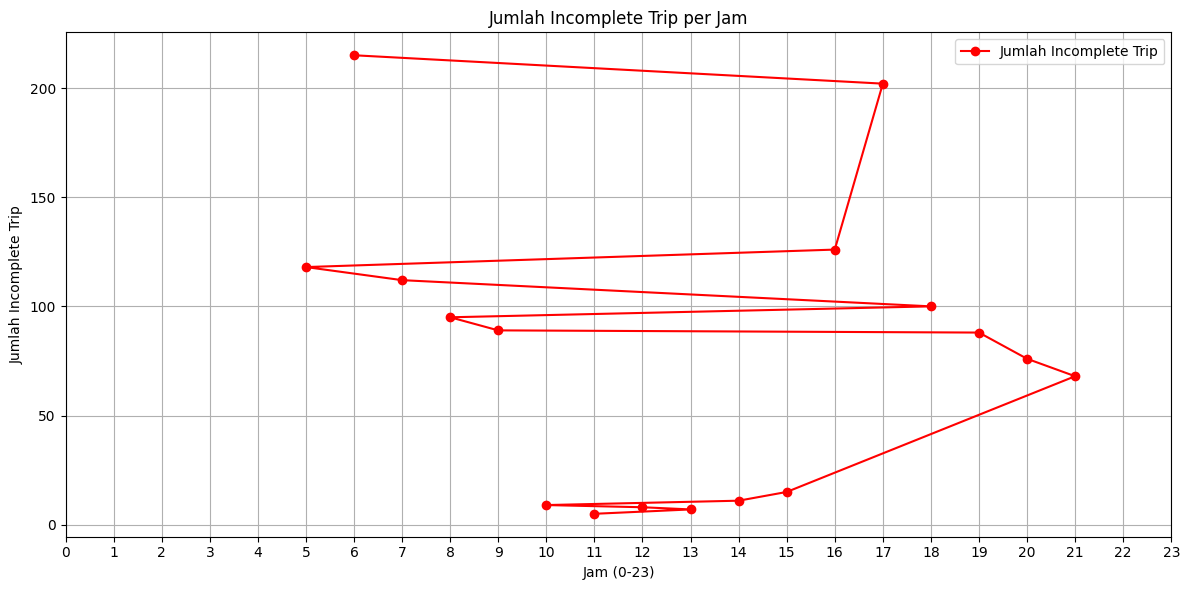

In [40]:
import matplotlib.pyplot as plt
trip_summary_sorted = trip_summary_sorted.reset_index()

plt.figure(figsize=(12, 6))
plt.plot(trip_summary_sorted['hour'], trip_summary_sorted['Incomplete'], marker='o', color='red', label='Jumlah Incomplete Trip')
plt.title('Jumlah Incomplete Trip per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Incomplete Trip')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan data diatas, dapat dilihat bahwa jumlah incomplete trip dapat dilihat dari top 5 incomplete terbanayak adalah pada jam berangkat kerja (5-7 pagi) dan pulang kerja (16-17 sore)

Untuk menjawab pertanyaan berikutnya saya akan melakukan uji hipotesis dengan :
H0: Tidak ada hubungan antara jam dan status trip -> proporsi sama di semua jam.
H1: Ada hubungan antara jam dan status trip -> proporsi berbeda antar jam.

In [41]:
crosstab = pd.crosstab(df['hour'], df['trip_status'])

chi2, p_value, dof, expected = chi2_contingency(crosstab)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Terdapat perbedaan signifikan proporsi incomplete trip antar jam (Tolak H0)")
else:
    print("Tidak terdapat perbedaan signifikan proporsi incomplete trip antar jam (Gagal tolak H0)")

Chi-square Statistic: 20.0257
P-value: 0.2191
Tidak terdapat perbedaan signifikan proporsi incomplete trip antar jam (Gagal tolak H0)


Berdasarkan pengujian, dapat disimpulkan bahwa Tidak terdapat perbedaan signifikan proporsi incomplete trip antar jam (Gagal tolak H0). Artinya, mesikpun trip incomplete terbanayak adalah pada jam berangkat kerja (5-7 pagi) dan pulang kerja (16-17 sore), namun secara statistik variasi ini belium cukup untuk dianggap signifikan

### Pembayaran dan Bank
- Apakah pengguna dari bank tertentu lebih sering mengalami incomplete trip?
- Apakah nilai pembayaran bervariasi antar bank?
- Adakah kecenderungan pengguna dari bank tertentu melakukan perjalanan gratis (payAmount = 0)?

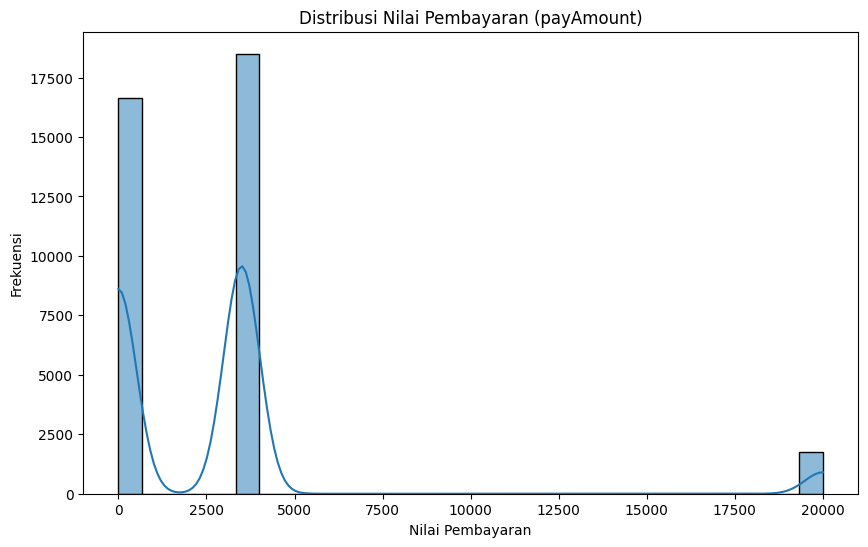

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['payAmount'], bins=30, kde=True)
plt.title('Distribusi Nilai Pembayaran (payAmount)')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Frekuensi')
plt.show()

In [43]:
avg_payment_per_bank = df.groupby('payCardBank', observed=True)['payAmount'].mean().sort_values(ascending=False)
print(avg_payment_per_bank)

payCardBank
brizzi    3507.548845
emoney    3051.308745
flazz     2854.880414
bni       2552.278820
online    2514.296188
dki       2444.656281
Name: payAmount, dtype: float64


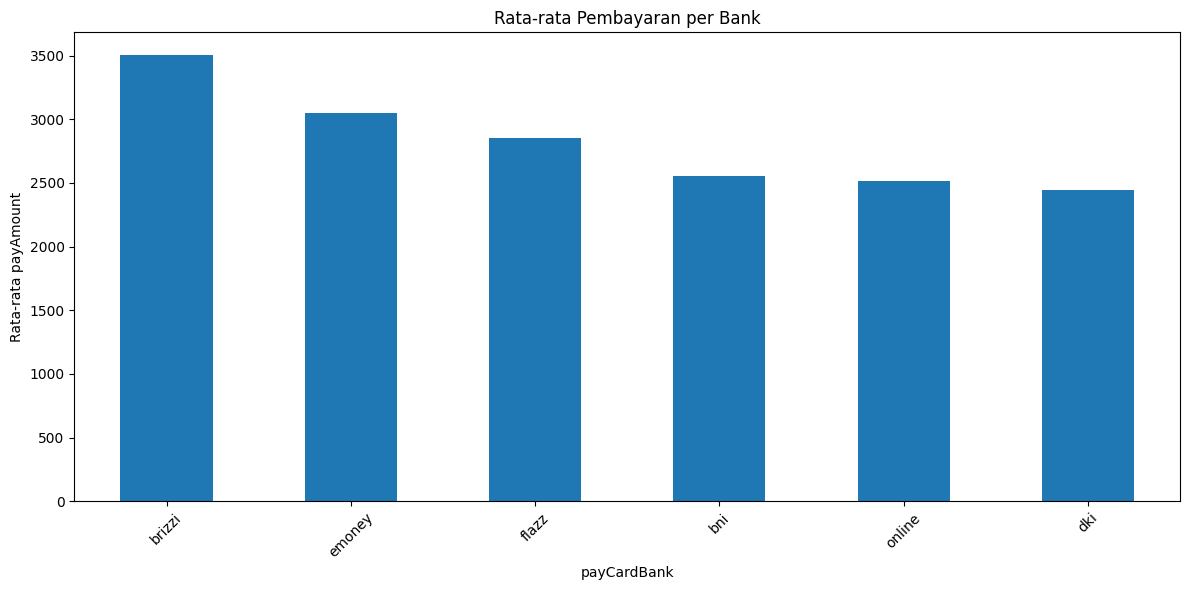

In [44]:
plt.figure(figsize=(12, 6))
avg_payment_per_bank.plot(kind='bar')
plt.title('Rata-rata Pembayaran per Bank')
plt.ylabel('Rata-rata payAmount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

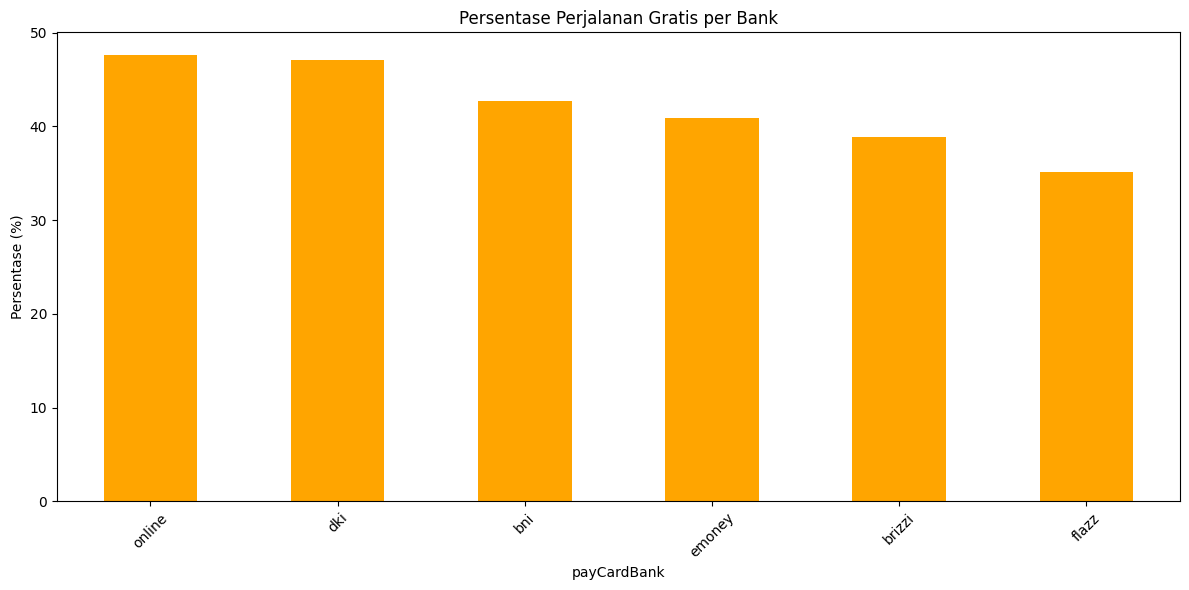

In [45]:
free_trip_rate = df.groupby('payCardBank', observed=True)['payAmount'].apply(lambda x: (x == 0).mean() * 100)
free_trip_rate = free_trip_rate.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
free_trip_rate.plot(kind='bar', color='orange')
plt.title('Persentase Perjalanan Gratis per Bank')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

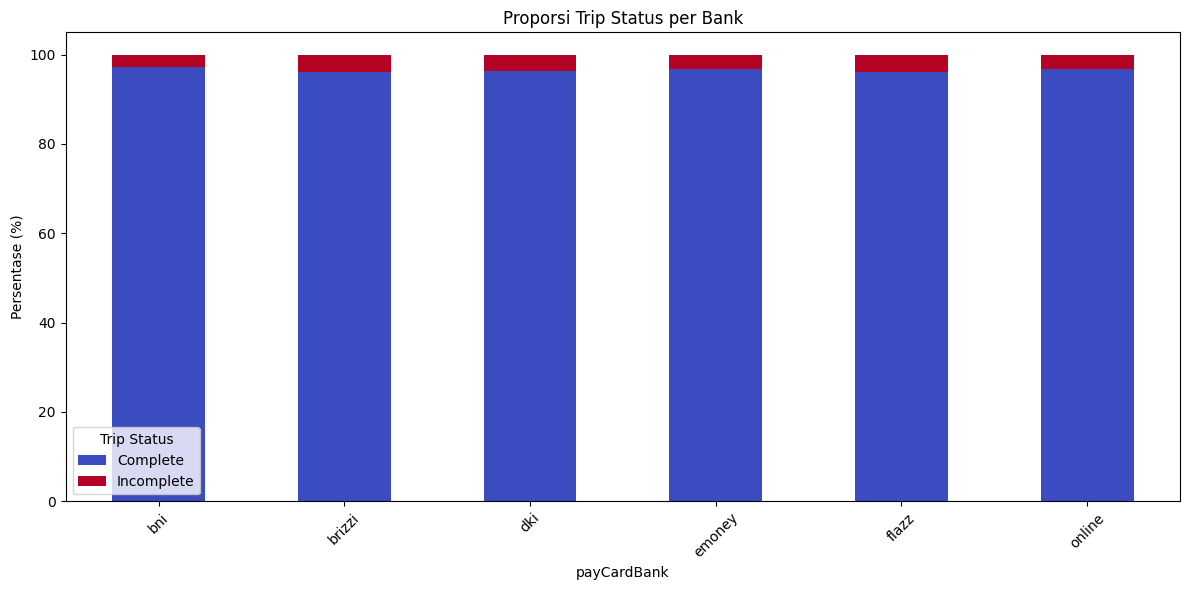

In [46]:
trip_bank_ct = pd.crosstab(df['payCardBank'], df['trip_status'], normalize='index') * 100
trip_bank_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Proporsi Trip Status per Bank')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Trip Status')
plt.tight_layout()
plt.show()

Saya juga akan melakukan uji statistik untuk mengetahui apakah terdapat perbedaan proporsi pengguna yang melakukan free trip antar bank secara signifikan.
H0 : Proporsi free trip antar bank tidak berbeda secara signifikan. (Semua bank punya peluang yang sama terhadap free trip)
H1 :  Proporsi free trip antar bank berbeda secara signifikan.

In [47]:
df['is_free_trip'] = df['payAmount'] == 0

In [48]:
contingency_table = pd.crosstab(df['payCardBank'], df['is_free_trip'])
display(contingency_table)

is_free_trip,False,True
payCardBank,,
bni,1521,1136
brizzi,2157,1374
dki,9917,8826
emoney,4057,2809
flazz,2098,1136
online,1502,1367


In [49]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Terdapat perbedaan signifikan proporsi free trip antar bank (Tolak H0)")
else:
    print("Tidak terdapat perbedaan signifikan proporsi free trip antar bank (Gagal tolak H0)")

Chi-square Statistic: 256.7851
P-value: 0.0000
Terdapat perbedaan signifikan proporsi free trip antar bank (Tolak H0)


Berdasarkan hal tersebut, dapat disimpulkan bahwa :
- Nilai pembayaran paling tinggi ada di 3500, diikuti oleh 0 dan 20000
- Setiap bank memiliki proporsi payAmount yang berbeda
- Terdapat perbedaan signifikan proporsi free trip antar bank.

### Hasil Analisa dan Kesimpulan


1. Usia Pengguna
- Terdapat perbedaan usia yang signifikan antara pengguna yang mengalami incomplete trip dan complete trip.
- Pengguna incomplete trip cenderung memiliki rata-rata usia sedikit lebih tinggi dibandingkan complete trip.

2. Jenis Kelamin
- Tidak terdapat perbedaan signifikan dalam proporsi jenis kelamin antara pengguna incomplete dan complete trip. Artinya, incomplete trip terjadi relatif merata antara pria dan wanita.

3. Lokasi dan Koridor (Rute)
- Titik-titik incomplete trip tersebar luas, tetapi terdapat konsentrasi tinggi di wilayah Jakarta Pusat dan timur menuju Selatan.
- Berdasarkan heatmap, daerah-daerah pada jakarta pusat dan timur selatan menjadi hotspot untuk incomplete trip.
- Terdapat beberapa koridor dengan persentase incomplete trip tertinggi, misalnya: Tanah Abang – Kebayoran Lama via Pos Pengumben, Kp. Rambutan – Taman Wiladatika, Rusun Marunda – Tanjung Priok
- Koridor-koridor tersebut patut mendapatkan perhatian khusus untuk investigasi lebih lanjut.

4. Waktu (Jam) Perjalanan
- Incomplete trip banyak terjadi pada jam sibuk (pagi hari 5–7 dan sore hari 16–17).
- Namun, berdasarkan uji statistik, tidak terdapat perbedaan signifikan dalam proporsi incomplete trip antar jam (gagal tolak H₀).

5. Pembayaran dan Bank
- Nilai pembayaran tertinggi berada pada Rp 3.500, diikuti oleh Rp 0 (gratis) dan Rp 20.000.
- Harga 20.000 ini bisa jadi disebabkan oleh kesalahan sistem, karena harga transjakarta biasanya flat
- Setiap bank memiliki proporsi payAmount yang berbeda, menunjukkan variasi perilaku atau kebijakan antar bank.
- Perjalanan gratis paling banyak terjadi pada pengguna bank Bank Online, Bank DKI, dan BNI.
- terdapat perbedaan signifikan proporsi free trip antar bank (Tolak H₀).
- total incomplete trip mencapai 2289. Asumsi harga dipukul rata 3500, PT memiliki potensi untuk kehilangan 8 juta



### Rekomendasi

1. Lakukan edukasi atau sosialisasi khusus kepada kelompok usia yang lebih tua terkait cara penggunaan sistem transportasi, validasi kartu, serta prosedur naik/turun.
- Sosialisasi langsung di halte-halte sibuk dengan petugas yang membantu penumpang lanjut usia
- Pemasangan poster atau infografik sederhana tentang cara tap-in dan tap-out di titik masuk/keluar
- Penyuluhan melalui media sosial dan komunitas lansia mengenai prosedur perjalanan yang benar
- Penyediaan panduan visual atau video pendek di layar halte dan di dalam bus
2. Fokuskan upaya monitoring dan peningkatan layanan pada rute Tanah Abang – Kebayoran Lama, Kp. Rambutan – Taman Wiladatika, dan Rusun Marunda – Tanjung Priok.
- Penempatan petugas tambahan jika memungkinkan.
- Menempatkan papan informasi digital yang menjelaskan tata cara validasi.
- Perbaikan dan pengecekan sistem tap-in/tap-out.
3. Peninjauan Sistem dan Prosedur Pembayaran
- Audit sistem transaksi yang menghasilkan nominal tidak wajar seperti Rp 20.000.
- Lakukan error logging untuk setiap anomali transaksi.
- Validasi sistem integrasi antar bank untuk memastikan keakuratan data.
4. Penyesuaian Jadwal dan Kapasitas pada Jam Sibuk
- Tambah frekuensi armada pada jam 5–7 dan 16–17 untuk mengurangi kepadatan yang mungkin membuat pengguna gagal tap-out.
- Tambahkan reminder visual dan audio pada jam sibuk untuk mengingatkan pengguna agar tap-out.
5. Integrasi Sistem dan Alert Otomatis
- Implementasi sistem deteksi otomatis untuk mendeteksi potensi incomplete trip secara real-time.
- Kirim notifikasi ke pengguna melalui aplikasi apabila transaksi tap-out tidak tercatat.